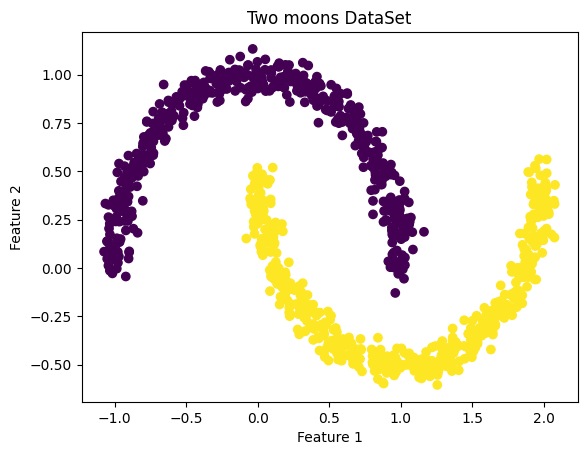

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate the data
dataset1_X, dataset1_y = make_moons(n_samples=1000, noise=0.05, random_state=0)


# Plot the data
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=dataset1_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()

In [70]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate the dataset
dataset1_X, dataset1_y = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Randomly select a subset of your data
N = 200  # number of samples to select
indices = np.random.choice(dataset1_X.shape[0], size=N, replace=False)
subset_X = dataset1_X[indices]

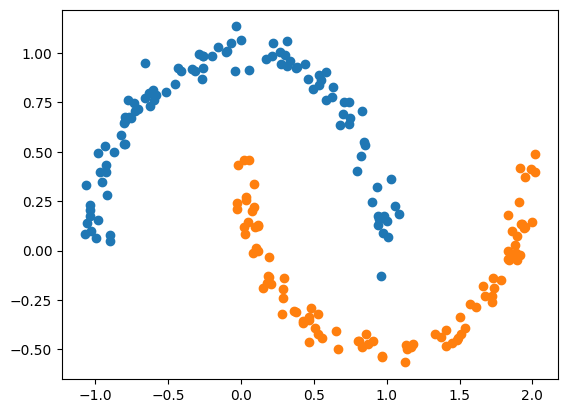

In [71]:
# Define the number of clusters
num_clusters = 2

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage="single", metric="euclidean")
agg_clustering.fit(subset_X)

# Get cluster labels
cluster_labels = agg_clustering.labels_
unique_clusters = np.unique(cluster_labels)

# Plot the clusters
for i in range(num_clusters):
    plt.scatter(subset_X[cluster_labels == i, 0], subset_X[cluster_labels == i, 1])
plt.show()

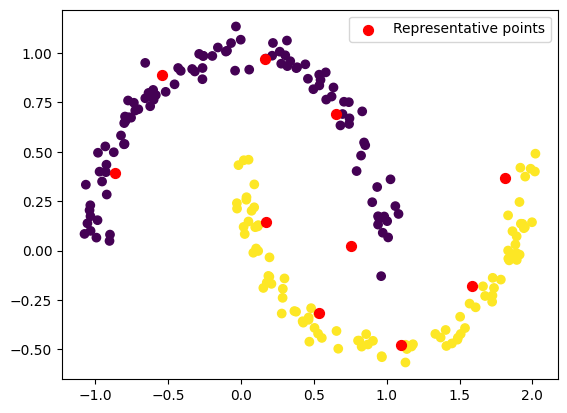

In [72]:

from sklearn.metrics.pairwise import euclidean_distances

# Select representative points for each cluster
num_representatives = 5  # number of representative points per cluster
representative_points = []

for i in range(0, num_clusters ):
    # Get points in cluster
    points_in_cluster = subset_X[cluster_labels == i]
    
    # Compute centroid of the cluster
    centroid = np.mean(points_in_cluster, axis=0)
    
    # Initialize the representative points as the point farthest from the centroid
    distances = np.linalg.norm(points_in_cluster - centroid, axis=1)
    farthest_point_index = np.argmax(distances)
    reps = [points_in_cluster[farthest_point_index]]
    
    # Iteratively select the point that is farthest from the current set of representative points
    for _ in range(num_representatives - 1):
        distances = euclidean_distances(points_in_cluster, reps).min(axis=1)
        farthest_point_index = np.argmax(distances)
        reps.append(points_in_cluster[farthest_point_index])
    
    # Add the representative points to the list
    representative_points.extend(reps)

representative_points = np.array(representative_points)

# Shift representative points towards centroid
for i in range(representative_points.shape[0]):
    cluster_centroid = np.mean(subset_X[cluster_labels == unique_clusters[i // (num_representatives)]], axis=0)
    representative_points[i] = representative_points[i] * 0.8 + cluster_centroid * 0.2

# Calculate distance to representative points for each data point
distances_to_representatives = np.linalg.norm(dataset1_X[:, None] - representative_points[None, :], axis=-1)

# Assign each point to the cluster of the closest representative point
assigned_cluster_labels = np.argmin(distances_to_representatives, axis=-1) + 1

# Plot the results
plt.scatter(subset_X[:, 0],subset_X[:, 1], c=cluster_labels)
plt.scatter(representative_points[:, 0], representative_points[:, 1], c='red', s=50, label='Representative points')
plt.legend()
plt.show()


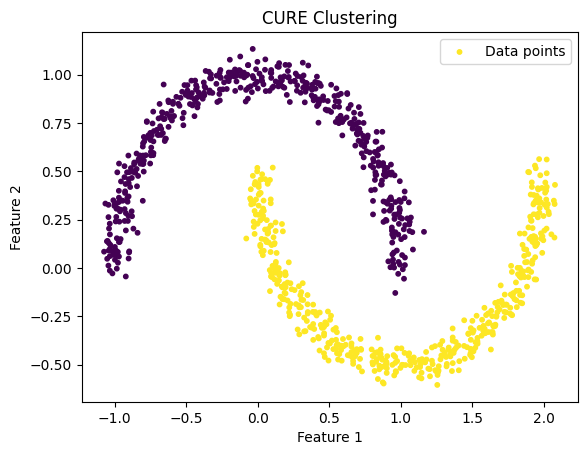

In [73]:
# Calculate distance to representative points for each data point in the entire dataset
distances_to_representatives = np.linalg.norm(dataset1_X[:, None] - representative_points[None, :], axis=-1)

# Assign each point to the cluster of the closest representative point
assigned_cluster_labels = np.argmin(distances_to_representatives, axis=-1) // num_representatives + 1

# Plot the results
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=assigned_cluster_labels, s=10, cmap='viridis', label='Data points')
plt.title('CURE Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

دیتاست دوم

In [74]:
def data_generator():
  n = 2000
  t = np.linspace(0, 2*np.pi, n)
  r = np.linspace(0.5, 1, n)
  x1 = r * np.cos(t) + np.random.randn(n) * 0.033
  y1 = r * np.sin(t) + np.random.randn(n) * 0.033
  x2 = -r * np.cos(t) + np.random.randn(n) * 0.033
  y2 = -r * np.sin(t) + np.random.randn(n) * 0.033
  X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
  y = np.hstack((np.zeros(n), np.ones(n)))

  return X,y

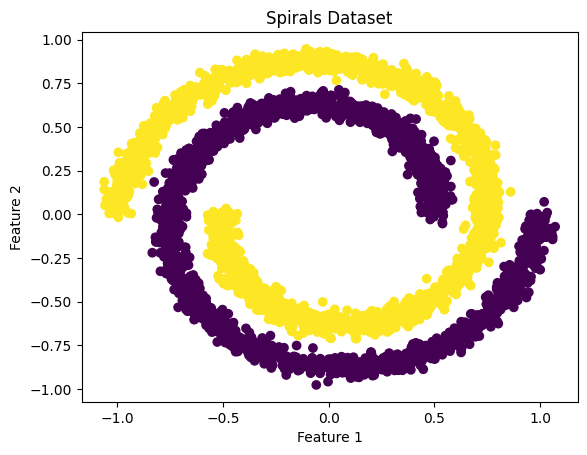

In [53]:
import numpy as np
import matplotlib.pyplot as plt


Dataset2_X, Dataset2_y = data_generator()


plt.scatter(Dataset2_X[:, 0], Dataset2_X[:, 1], c=Dataset2_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spirals Dataset')
plt.show()

In [78]:
N = 1000  # number of samples to select
indices = np.random.choice(Dataset2_X.shape[0], size=N, replace=False)
subset_X = Dataset2_X[indices]

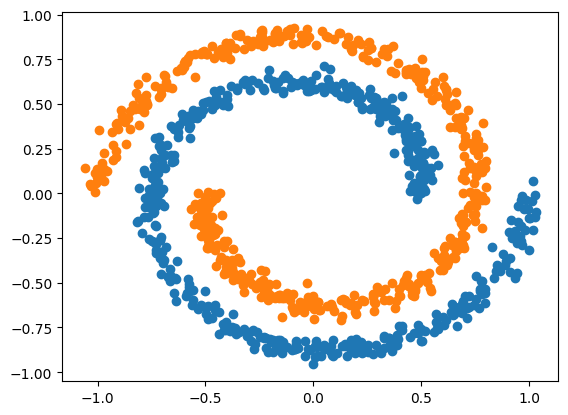

In [79]:
num_clusters = 2

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage="single", metric="euclidean")
agg_clustering.fit(subset_X)

# Get cluster labels
cluster_labels = agg_clustering.labels_
unique_clusters = np.unique(cluster_labels)

# Plot the clusters
for i in range(num_clusters):
    plt.scatter(subset_X[cluster_labels == i, 0], subset_X[cluster_labels == i, 1])
plt.show()

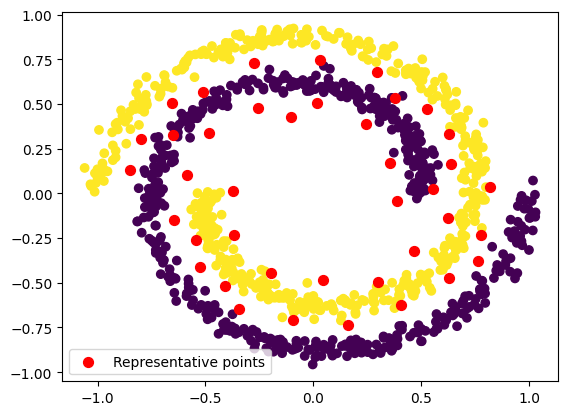

In [86]:
# Select representative points for each cluster
num_representatives = 20  # number of representative points per cluster
representative_points = []

for i in range(0, num_clusters ):
    # Get points in cluster
    points_in_cluster = subset_X[cluster_labels == i]
    
    # Compute centroid of the cluster
    centroid = np.mean(points_in_cluster, axis=0)
    
    # Initialize the representative points as the point farthest from the centroid
    distances = np.linalg.norm(points_in_cluster - centroid, axis=1)
    farthest_point_index = np.argmax(distances)
    reps = [points_in_cluster[farthest_point_index]]
    
    # Iteratively select the point that is farthest from the current set of representative points
    for _ in range(num_representatives - 1):
        distances = euclidean_distances(points_in_cluster, reps).min(axis=1)
        farthest_point_index = np.argmax(distances)
        reps.append(points_in_cluster[farthest_point_index])
    
    # Add the representative points to the list
    representative_points.extend(reps)

representative_points = np.array(representative_points)

# Shift representative points towards centroid
for i in range(representative_points.shape[0]):
    cluster_centroid = np.mean(subset_X[cluster_labels == unique_clusters[i // (num_representatives)]], axis=0)
    representative_points[i] = representative_points[i] * 0.8 + cluster_centroid * 0.2

# Calculate distance to representative points for each data point
distances_to_representatives = np.linalg.norm(dataset1_X[:, None] - representative_points[None, :], axis=-1)

# Assign each point to the cluster of the closest representative point
assigned_cluster_labels = np.argmin(distances_to_representatives, axis=-1) + 1

# Plot the results
plt.scatter(subset_X[:, 0],subset_X[:, 1], c=cluster_labels)
plt.scatter(representative_points[:, 0], representative_points[:, 1], c='red', s=50, label='Representative points')
plt.legend()
plt.show()

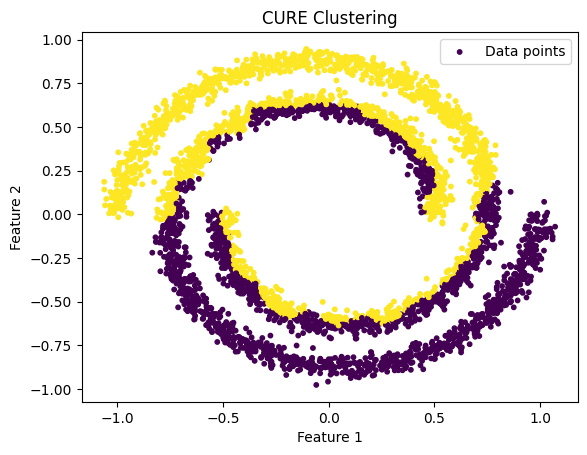

In [87]:
# Calculate distance to representative points for each data point in the entire dataset
distances_to_representatives = np.linalg.norm(Dataset2_X[:, None] - representative_points[None, :], axis=-1)

# Assign each point to the cluster of the closest representative point
assigned_cluster_labels = np.argmin(distances_to_representatives, axis=-1) // num_representatives + 1

# Plot the results
plt.scatter(Dataset2_X[:, 0], Dataset2_X[:, 1], c=assigned_cluster_labels, s=10, cmap='viridis', label='Data points')
plt.title('CURE Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()